In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import community as community_louvain

In [11]:
df=pd.DataFrame(np.array([["A","B",50],["B","A",15],["C","A",30],["D","A",23],["D","E",53],["F","B",20],["A","G",16],["H","A",12],["E","A",22],["I","J",30],["F","I",10000],["J","E",1],["D","B",1000000]]),columns=["Source","Target","Value"])
# arr=[['1', '2'], ['1', '3'], ['2', '1'], ['3', '1']]
# df=pd.DataFrame(arr,columns=["x","y"])
# df

In [3]:
import pandas as pd

arr=[['1', '2'], ['1', '3'], ['2', '1'], ['3', '1'],["1","2"]]

df1 = pd.Series(arr).value_counts().sort_index().reset_index().reset_index(drop=True)
df1.columns = ['Element', 'Frequency']

# Original list

# printing result
# print(f"The list frequency of elements is :\n {df1.to_string(index=False)}" )
df1.apply(lambda row: row["Element"].append(row["Frequency"]),axis=1)
list(df1["Element"])


[['1', '2', 2], ['1', '3', 1], ['2', '1', 1], ['3', '1', 1]]

In [25]:
graph=nx.from_pandas_edgelist(df,source="Source",target="Target",edge_attr="Value",create_using=nx.Graph())
# graph=nx.from_pandas_edgelist(df,source="x",target="y",edge_attr=None,create_using=nx.DiGraph())

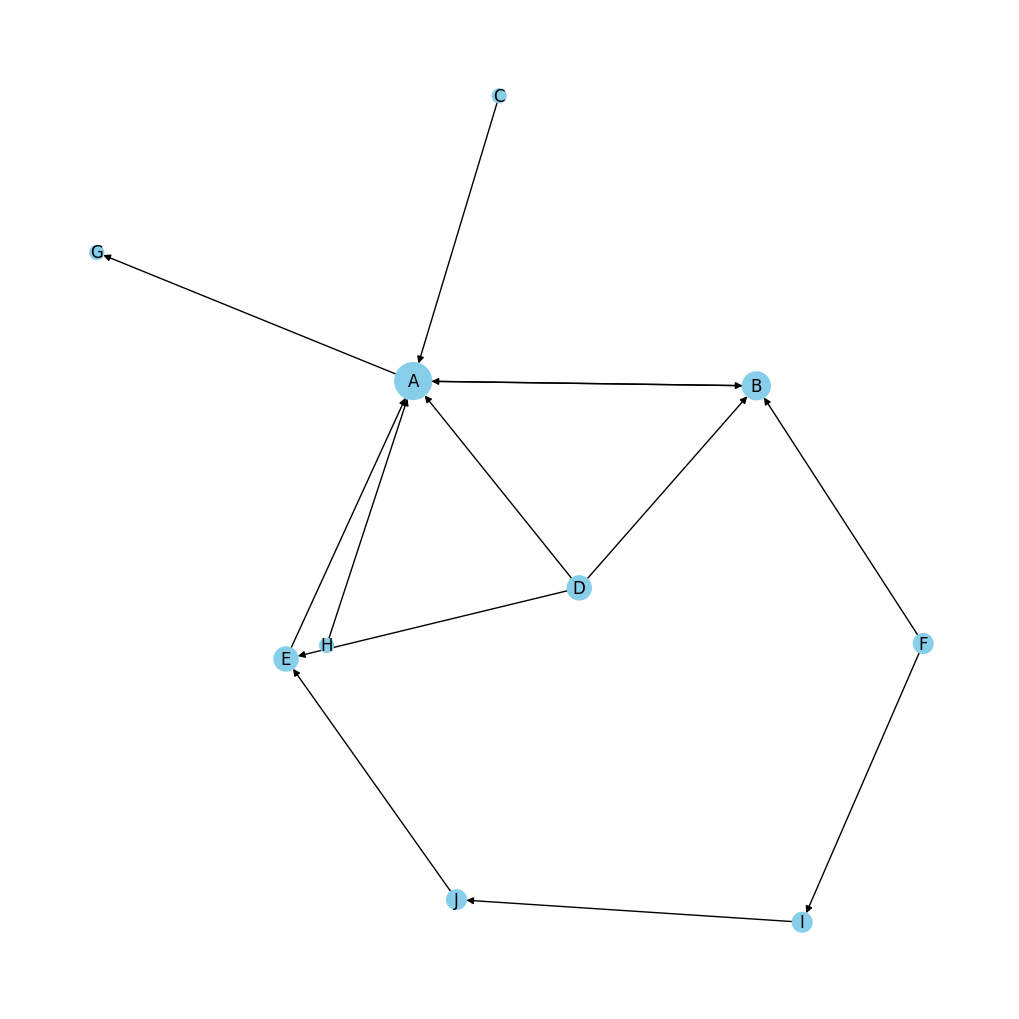

In [13]:
plt.figure(figsize=(10,10))
pos=nx.kamada_kawai_layout(graph)
node_degree=dict(graph.degree)
nx.draw(graph,with_labels=True,node_color="skyblue",edge_cmap=plt.cm.Blues,pos=pos, node_size=[v * 100 for v in node_degree.values()])


In [18]:
# network=Network(notebook=True, width="1000px", height="700px", bgcolor="#222222",font_color="white")
node_degree=dict(graph.degree)
print(node_degree)
network=Network( width="1000px", height="700px", bgcolor="#222222",font_color="white",directed=True)
network.from_nx(graph)
network.show("Releation.html")

{'A': 7, 'B': 4, 'C': 1, 'D': 3, 'E': 3, 'F': 2, 'G': 1, 'H': 1, 'I': 2, 'J': 2}


In [19]:
degree_dict=nx.degree_centrality(graph)
degree_dict

[7:18:6.358]	[139749438220032]	[Event_id: UnsupportedDestinationScheme]	[File: urlrep.cpp]	[Line: 154]	uri: file:///home/panda/Projects/Collage/Data%20Structure/Releation.html,

{'A': 0.7777777777777777,
 'B': 0.4444444444444444,
 'C': 0.1111111111111111,
 'D': 0.3333333333333333,
 'E': 0.3333333333333333,
 'F': 0.2222222222222222,
 'G': 0.1111111111111111,
 'H': 0.1111111111111111,
 'I': 0.2222222222222222,
 'J': 0.2222222222222222}

Opening in existing browser session.


<AxesSubplot: >

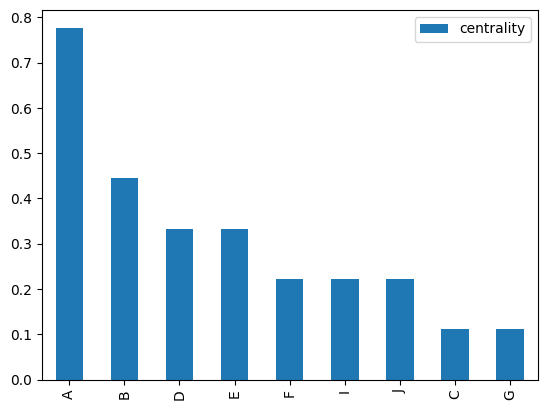

In [20]:
degree_df=pd.DataFrame.from_dict(degree_dict,orient="index",columns=["centrality"])
degree_df.sort_values("centrality",ascending=False)[:9].plot(kind="bar")

<AxesSubplot: >

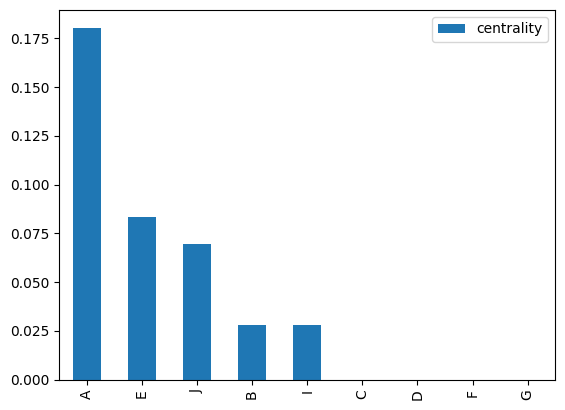

In [21]:
betweenness_dict=nx.betweenness_centrality(graph)
betweenness_df=pd.DataFrame.from_dict(betweenness_dict,orient="index",columns=["centrality"])

betweenness_df.sort_values("centrality",ascending=False)[:9].plot(kind="bar")

<AxesSubplot: >

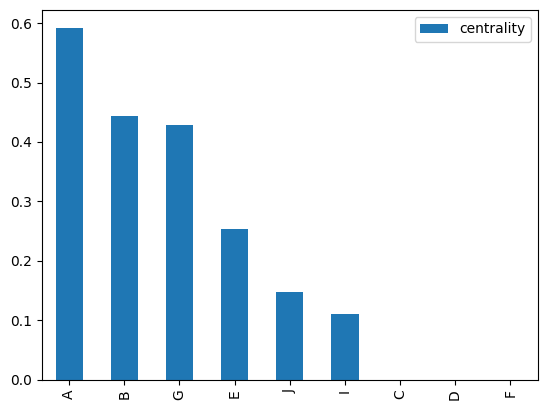

In [22]:
closeness_dict=nx.closeness_centrality(graph)
closeness_df=pd.DataFrame.from_dict(closeness_dict,orient="index",columns=["centrality"])

closeness_df.sort_values("centrality",ascending=False)[:9].plot(kind="bar")

In [23]:
nx.set_node_attributes(graph,degree_dict,"degree_centrality")
nx.set_node_attributes(graph,betweenness_dict,"betweeness_centrality")
nx.set_node_attributes(graph,closeness_dict,"closeness_centrality")

In [26]:
communities= community_louvain.best_partition(graph)
communities

{'A': 0,
 'B': 1,
 'C': 0,
 'D': 1,
 'E': 2,
 'F': 2,
 'G': 0,
 'H': 0,
 'I': 2,
 'J': 2}

In [27]:
c={'A': 20, 'B': 100, 'C': 29, 'D': 40, 'E': 0, 'F': 1, 'G': 2, 'H': 2}

In [28]:
nx.set_node_attributes(graph,communities,"group")

In [30]:
com_net=Network(width="1000px",height="700px",bgcolor="#222222",font_color="white")
com_net.from_nx(graph)
com_net.show("graaaa.html")

[7:19:8.490]	[139749446612736]	[Event_id: UnsupportedDestinationScheme]	[File: urlrep.cpp]	[Line: 154]	uri: file:///home/panda/Projects/Collage/Data%20Structure/graaaa.html,

Opening in existing browser session.


[4361:6004:1217/091941.847391:ERROR:get_updates_processor.cc(311)] PostClientToServerMessage() failed during GetUpdates with error 103


In [37]:
z={'A': 1, 'B': 2, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 1, 'H': 1}

In [ ]:
!pip install pyvis

In [31]:
pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 935.8 kB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=ab7abf7ab72fb5da96964486fbc298a7184c585b9df0b67a1b0e2eb1b256f5d0
  Stored in directory: /home/panda/.cache/pip/wheels/83/34/49/b8b798df4e7b298384678b11da8e611d17201fd1ecffb804c2
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


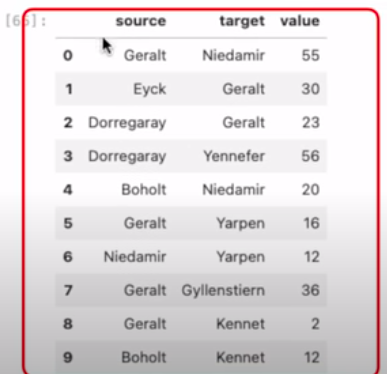

In [37]:
!python -m pip uninstall pandas --yes

Found existing installation: pandas 1.5.2
Uninstalling pandas-1.5.2:
  Successfully uninstalled pandas-1.5.2


In [8]:
pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pyviz==0.0.1

ERROR: Could not find a version that satisfies the requirement pyviz==0.0.1 (from versions: 0.9, 0.9.1, 0.10.0, 0.10.1, 0.10.2, 0.10.3)
ERROR: No matching distribution found for pyviz==0.0.1
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pipwin

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 683.8 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.1/340.1 kB 683.3 kB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for pipwin: filename=pipwin-0.5.2-py2.py3-none-any.whl size=8774 sha256=53563cdff9fe7b9ae3d2b477360b6930e6588292a8d1cceb7cd706cf04915e70
  Stored in directory: /home/panda/.cache/pip/wheels/c6/31/9a/8f86ebd42b0c30c6dc0fcdcce791c3f905a54ace9381ee03bc
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a09db1493adcefb92a6cd035057553eda41eabd419ab2cc5f7fcb1b3bf0d04e5
  Stored in directory: /home/panda/.cache/pip/wheels/7c/d7/8d/2156234738063e3d4a39ba77dc677046100e62766b53807189
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25983 sha256=a4d0bacb691991e3508ca33017507e8e593098f4fbc072ae44

In [1]:
pipwin install pandas

SyntaxError: invalid syntax (<ipython-input-1-cbb1ccc5d548>, line 1)

In [2]:
py -m pip install pipwin

SyntaxError: invalid syntax (<ipython-input-2-94dd1e927758>, line 1)

In [6]:
!pip install pyviz

  Using cached pyviz-0.10.3-py2.py3-none-any.whl (16.4 MB)
  Using cached netCDF4-1.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.0.3-cp310-cp310-linux_x86_64.whl
  Using cached datashader-0.14.3-py2.py3-none-any.whl (18.2 MB)
  Using cached selenium-4.7.2-py3-none-any.whl (6.3 MB)
  Using cached hvplot-0.8.2-py2.py3-none-any.whl (3.2 MB)
  Using cached holoviews-1.15.3-py2.py3-none-any.whl (4.3 MB)
  Using cached fastparquet-2022.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
  Using cached xarray-0.11.3-py2.py3-none-any.whl (504 kB)
  Using cached rise-5.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached distributed-2022.12.0-py3-none-any.whl (925 kB)
  Using cached colorcet-3.0.1-py2.py3-none-any.whl (1.7 MB)
  Using cached datashape-0.5.2-py3-none-any.whl
  Using cached fastparquet-2022.11.0-cp310-cp310-manylinux_2_17_x

  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached distributed-2022.11.1-py3-none-any.whl (923 kB)
  Using cached tornado-6.1.tar.gz (497 kB)
  Preparing metadata (setup.py) ... done
  Using cached distributed-2022.11.0-py3-none-any.whl (923 kB)
  Using cached distributed-2022.10.2-py3-none-any.whl (918 kB)
  Using cached distributed-2022.10.0-py3-none-any.whl (908 kB)
  Using cached distributed-2022.9.2-py3-none-any.whl (906 kB)
  Using cached distributed-2022.9.1-py3-none-any.whl (903 kB)
  Using cached distributed-2022.9.0-py3-none-any.whl (902 kB)
  Using cached distributed-2022.8.1-py3-none-any.whl (893 kB)
  Using cached distributed-2022.8.0-py3-none-any.whl (890 kB)
  Using cached distributed-2022.7.1-py3-none-any.whl (889 kB)
  Using cached distributed-2022.7.0-py3-none-any.whl (885 kB)
  Using cached distributed-2022.6.1-py3-none-any.whl (882 kB)
  Using cached distributed-2022.6.0-py3-none-any.whl (872 kB)
  Using cached distributed-2022.5.2-py3-none-

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1008 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/conftest.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/testing.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/__init__.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/_version.py -> build/lib.linux-x86_64-cpython-310/pandas
      creating build/lib.linux-x86_64-cpython-310/pandas/plotting
      copying pandas/plotting/_tools.py -> build/lib.linux-x86_64-cpython-310/pandas/plotting
      copying pandas/plotting/_core.py -> build/lib.linux-x86_64-cpython-310/pandas/plotting
      copying pandas/plotting/_compat.py -> build/lib.linux-x86_64-cpython-310/pandas/plotting

      copying pandas/tests/indexes/datetimes/test_setops.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_indexing.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_datetime.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_ops.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_construction.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_datetimelike.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_misc.py -> build/lib.linux-x86_64-cpython-310/pandas/tests/indexes/datetimes
      copying pandas/tests/indexes/datetimes/test_arithmetic.py -> build/lib.linux-x86

Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
  Running setup.py install for pandas ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for pandas did not run successfully.
  │ exit code: 1
  ╰─> [887 lines of output]
      running install
      /home/panda/anaconda3/envs/collage/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/conftest.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/testing.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/__init__.py -> b

In [6]:
!pip install --upgrade werkzeug 

  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)


In [9]:
!pip install  werkzeug 

In [ ]:
def directed_visuals(users):
    #Calculate all possible user combinations
    combinations=[]
    for user in users:
        for follower in users[user].followers:
            combinations.append([users[user].id,follower.id])
    
    #Calculate the frequency of same combination an obtain arr which is same as combinations but with the frequency added to each list

    df = pd.Series(combinations).value_counts().sort_index().reset_index().reset_index(drop=True)
    df.columns = ['Element', 'Frequency']
    df.apply(lambda row: row["Element"].append(row["Frequency"]),axis=1)
    arr=list(df["Element"]) 


    
    print(arr)
    df=pd.DataFrame(arr,columns=["Source","Target","Value"])

    # If you want to test bigger arrays and viasualize it comment the above code and remove the comment from the bottom code
    # df=pd.DataFrame(np.array([["A","B",50],["B","A",15],["C","A",30],["D","A",23],["D","E",53],["F","B",20],["A","G",16],["H","A",12],["E","A",22],["I","J",30],["F","I",10000],["J","E",1]]),columns=["Source","Target","Value"])
    graph=nx.from_pandas_edgelist(df,source="Source",target="Target",edge_attr=None,create_using=nx.DiGraph())
    plt.figure(figsize=(10,10))
    pos=nx.kamada_kawai_layout(graph)
    node_degree=dict(graph.degree)
    nx.draw(graph,with_labels=True,node_color="skyblue",edge_cmap=plt.cm.Blues,pos=pos, node_size=[v * 100 for v in node_degree.values()])
    plt.show()
    